In [37]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.drop(['ID'],axis =1, inplace = True)
test_data.drop(['ID'],axis =1, inplace = True)
out_data = train_data[train_data['class']== -999].index
new_train_data = train_data.drop(out_data)



In [16]:
new_train_data.shape

(4789, 9)

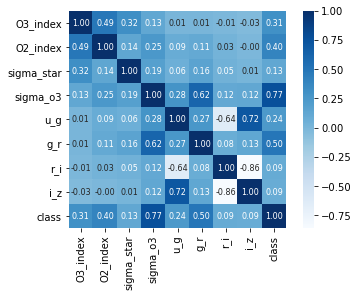

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = new_train_data.corr(method = 'pearson')
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws = {'size':8}, fmt = '.2f',square=True,cmap='Blues')

In [17]:
X_train = new_train_data.drop(['class'], axis=1)
y_train = new_train_data['class']


In [18]:
X_train.shape

(4789, 8)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)
scaler.fit(test_data)
scaler.transform(test_data)

array([[ 1.52747072e-01,  1.60454967e+00, -6.39206256e-01, ...,
        -1.26987621e+00, -2.65687391e-01, -1.68594206e-01],
       [ 1.96820817e+00,  3.89088651e-01,  2.03708330e-01, ...,
         2.73327118e-01,  1.89399286e-02,  8.33234947e-02],
       [-1.44959748e+00, -1.63592840e+00,  3.14011542e-01, ...,
         7.47206376e-01,  3.37180099e-02,  1.74161616e-01],
       ...,
       [ 1.26463217e+00, -2.59773812e-01,  6.35339861e-01, ...,
         1.25411023e+00,  2.27671536e-01,  1.36708441e-01],
       [-1.18675465e+00, -1.17255651e+00, -8.23475390e-01, ...,
        -1.04407660e+00, -2.23102021e-01, -1.89598514e-01],
       [ 1.00179475e+00,  9.86949330e-01,  1.81359903e+00, ...,
        -1.22618051e+00, -1.80839144e-01, -1.96431244e-03]])

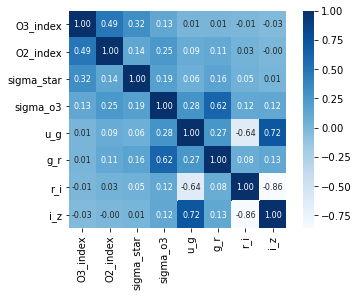

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = X_train.corr(method = 'pearson')
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws = {'size':8}, fmt = '.2f',square=True,cmap='Blues')

In [21]:
def up_iqr(data):
    q1, q3 = np.percentile(data,[25,75])
    iqr = q3 - q1
    upper_bound = q3 + (iqr*1.5)
    return upper_bound

def low_iqr(data):
    q1, q3 = np.percentile(data,[25,75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr*1.5)
    return lower_bound 

    


In [22]:
X_train.loc[(X_train.u_g >= up_iqr(X_train['u_g'])),'u_g'] = up_iqr(X_train['u_g'])
X_train.loc[(X_train.u_g <= low_iqr(X_train['u_g'])),'u_g'] = low_iqr(X_train['u_g'])

X_train.loc[(X_train.g_r>= up_iqr(X_train['g_r'])),'g_r'] = up_iqr(X_train['g_r'])
X_train.loc[(X_train.g_r <= low_iqr(X_train['g_r'])),'g_r'] = low_iqr(X_train['g_r'])

X_train.loc[(X_train.r_i>= up_iqr(X_train['r_i'])),'r_i'] = up_iqr(X_train['r_i'])
X_train.loc[(X_train.r_i <= low_iqr(X_train['r_i'])),'r_i'] = low_iqr(X_train['r_i'])

X_train.loc[(X_train.i_z >= up_iqr(X_train['i_z'])),'i_z'] = up_iqr(X_train['i_z'])
X_train.loc[(X_train.i_z <= low_iqr(X_train['i_z'])),'i_z'] = low_iqr(X_train['i_z'])

X_train.loc[(X_train.O3_index >= up_iqr(X_train['O3_index'])),'O3_index'] = up_iqr(X_train['O3_index'])
X_train.loc[(X_train.O3_index <= low_iqr(X_train['O3_index'])),'O3_index'] = low_iqr(X_train['O3_index'])

X_train.loc[(X_train.O2_index >= up_iqr(X_train['O2_index'])),'O2_index'] = up_iqr(X_train['O2_index'])
X_train.loc[(X_train.O2_index <= low_iqr(X_train['O2_index'])),'O2_index'] = low_iqr(X_train['O2_index'])

X_train.loc[(X_train.sigma_star >= up_iqr(X_train['sigma_star'])),'sigma_star'] = up_iqr(X_train['sigma_star'])
X_train.loc[(X_train.sigma_star <= low_iqr(X_train['sigma_star'])),'sigma_star'] = low_iqr(X_train['sigma_star'])

X_train.loc[(X_train.sigma_o3 >= up_iqr(X_train['sigma_o3'])),'sigma_o3'] = up_iqr(X_train['sigma_o3'])
X_train.loc[(X_train.sigma_o3 <= low_iqr(X_train['sigma_o3'])),'sigma_o3'] = low_iqr(X_train['sigma_o3'])


In [23]:
test_data.loc[(test_data.u_g >= up_iqr(test_data['u_g'])),'u_g'] = up_iqr(test_data['u_g'])
test_data.loc[(test_data.u_g <= low_iqr(test_data['u_g'])),'u_g'] = low_iqr(test_data['u_g'])

test_data.loc[(test_data.g_r >= up_iqr(test_data['g_r'])),'g_r'] = up_iqr(test_data['g_r'])
test_data.loc[(test_data.g_r <= low_iqr(test_data['g_r'])),'g_r'] = low_iqr(test_data['g_r'])

test_data.loc[(test_data.r_i >= up_iqr(test_data['r_i'])),'r_i'] = up_iqr(test_data['r_i'])
test_data.loc[(test_data.r_i <= low_iqr(test_data['r_i'])),'r_i'] = low_iqr(test_data['r_i'])

test_data.loc[(test_data.i_z >= up_iqr(test_data['i_z'])),'i_z'] = up_iqr(test_data['i_z'])
test_data.loc[(test_data.i_z <= low_iqr(test_data['i_z'])),'i_z'] = low_iqr(test_data['i_z'])

test_data.loc[(test_data.O3_index >= up_iqr(test_data['O3_index'])),'O3_index'] = up_iqr(test_data['O3_index'])
test_data.loc[(test_data.O3_index <= low_iqr(test_data['O3_index'])),'O3_index'] = low_iqr(test_data['O3_index'])

test_data.loc[(test_data.O2_index >= up_iqr(test_data['O2_index'])),'O2_index'] = up_iqr(test_data['O2_index'])
test_data.loc[(test_data.O2_index <= low_iqr(test_data['O2_index'])),'O2_index'] = low_iqr(test_data['O2_index'])

test_data.loc[(test_data.sigma_star >= up_iqr(test_data['sigma_star'])),'sigma_star'] = up_iqr(test_data['sigma_star'])
test_data.loc[(test_data.sigma_star <= low_iqr(test_data['sigma_star'])),'sigma_star'] = low_iqr(test_data['sigma_star'])

test_data.loc[(test_data.sigma_o3 >= up_iqr(test_data['sigma_o3'])),'sigma_o3'] = up_iqr(test_data['sigma_o3'])
test_data.loc[(test_data.sigma_o3 <= low_iqr(test_data['sigma_o3'])),'sigma_o3'] = low_iqr(test_data['sigma_o3'])

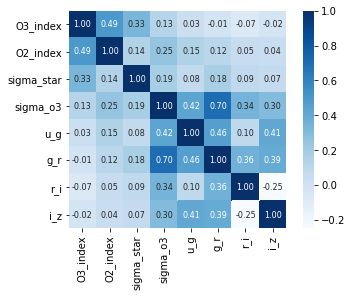

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = X_train.corr(method = 'pearson')
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws = {'size':8}, fmt = '.2f',square=True,cmap='Blues')

In [25]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit(y_train)
y_train = LE.transform(y_train)

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_train.shape

(4789, 4)

In [26]:
input_node = 8
hidden_node = [35,35]
output_node = 4

model = Sequential()
model.add(Dense(hidden_node[0], input_dim = input_node, kernel_initializer = 'normal', activation = 'relu', name = 'Hidden1'))
model.add(Dense(hidden_node[1], activation = 'relu', name = 'Hidden2'))
model.add(Dense(output_node, activation = 'softmax'))

In [27]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [28]:
model.fit(X_train, y_train, epochs = 50, batch_size =10, validation_split = 0.3)

Epoch 1/50
336/336 [==============================] - 1s 2ms/step - loss: 1.0378 - accuracy: 0.5922 - val_loss: 0.8459 - val_accuracy: 0.5957
Epoch 2/50
336/336 [==============================] - 0s 1ms/step - loss: 0.7832 - accuracy: 0.6268 - val_loss: 0.7541 - val_accuracy: 0.6381
Epoch 3/50
336/336 [==============================] - 0s 1ms/step - loss: 0.7194 - accuracy: 0.6659 - val_loss: 0.7098 - val_accuracy: 0.6688
Epoch 4/50
336/336 [==============================] - 0s 1ms/step - loss: 0.6759 - accuracy: 0.6832 - val_loss: 0.6747 - val_accuracy: 0.6917
Epoch 5/50
336/336 [==============================] - 0s 1ms/step - loss: 0.6360 - accuracy: 0.7029 - val_loss: 0.6449 - val_accuracy: 0.6931
Epoch 6/50
336/336 [==============================] - 0s 1ms/step - loss: 0.6125 - accuracy: 0.7348 - val_loss: 0.6350 - val_accuracy: 0.7370
Epoch 7/50
336/336 [==============================] - 0s 1ms/step - loss: 0.5949 - accuracy: 0.7691 - val_loss: 0.6085 - val_accuracy: 0.7808
Epoch 

In [29]:
y_pred = model.predict(test_data)
print(y_pred)

[[9.89736676e-01 1.02525745e-02 1.05690870e-05 9.80847901e-08]
 [2.50447039e-02 1.07604023e-02 9.53188837e-01 1.10060265e-02]
 [6.36661232e-01 3.63130212e-01 7.36742822e-06 2.01149596e-04]
 ...
 [2.47849654e-02 2.44034976e-02 9.02533054e-01 4.82785180e-02]
 [9.93252099e-01 6.74789725e-03 2.67700551e-09 2.48951859e-10]
 [9.84625697e-01 1.42791402e-02 1.09352719e-03 1.76570757e-06]]


In [30]:
predict_list =y_pred.argmax(axis=1)
for i in range(len(predict_list)):
    predict_list[i] += 1
print(predict_list)

[1 3 1 ... 3 1 1]


In [34]:
ID_list = pd.read_csv("test.csv")['ID']
x = [predict_list]
print(len(ID_list))

1199


In [36]:
        
def submission_csv(predict_list):
    for i in range(len(x)):
        submission = pd.DataFrame({
            "ID":ID_list,
            "class":x[i]
        })
        submission.to_csv('submission_'+'final_test1'+'.csv', index= False)
        
submission_csv(x)

In [ ]:
history = model.fit(X_train, y_train, epochs = 1000, batch_size =10, validation_split = 0.3)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy') 
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy') 
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()



Epoch 1/1000
336/336 [==============================] - 1s 2ms/step - loss: 0.9485 - accuracy: 0.6083 - val_loss: 0.7487 - val_accuracy: 0.6875
Epoch 2/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.6485 - accuracy: 0.7318 - val_loss: 0.6315 - val_accuracy: 0.7564
Epoch 3/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.5733 - accuracy: 0.7724 - val_loss: 0.5728 - val_accuracy: 0.7724
Epoch 4/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.5405 - accuracy: 0.7834 - val_loss: 0.5516 - val_accuracy: 0.7843
Epoch 5/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.5230 - accuracy: 0.7897 - val_loss: 0.5329 - val_accuracy: 0.7954
Epoch 6/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.5040 - accuracy: 0.8076 - val_loss: 0.5369 - val_accuracy: 0.7773
Epoch 7/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.4971 - accuracy: 0.8135 - val_loss: 0.5374 - val_accuracy:

336/336 [==============================] - 0s 1ms/step - loss: 0.3414 - accuracy: 0.8526 - val_loss: 0.4698 - val_accuracy: 0.8274
Epoch 114/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.3443 - accuracy: 0.8607 - val_loss: 0.4502 - val_accuracy: 0.8128
Epoch 115/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.3411 - accuracy: 0.8577 - val_loss: 0.4439 - val_accuracy: 0.8323
Epoch 116/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.3471 - accuracy: 0.8547 - val_loss: 0.4862 - val_accuracy: 0.8177
Epoch 117/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.3427 - accuracy: 0.8532 - val_loss: 0.4971 - val_accuracy: 0.8184
Epoch 118/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.3455 - accuracy: 0.8568 - val_loss: 0.4417 - val_accuracy: 0.8205
Epoch 119/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.3400 - accuracy: 0.8544 - val_loss: 0.4573 - val_accuracy: 

336/336 [==============================] - 0s 1ms/step - loss: 0.3181 - accuracy: 0.8690 - val_loss: 0.4478 - val_accuracy: 0.8302
Epoch 226/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.3164 - accuracy: 0.8693 - val_loss: 0.4670 - val_accuracy: 0.8344
Epoch 227/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.3214 - accuracy: 0.8616 - val_loss: 0.4487 - val_accuracy: 0.8344
Epoch 228/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.8681 - val_loss: 0.4590 - val_accuracy: 0.8239
Epoch 229/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.3138 - accuracy: 0.8675 - val_loss: 0.5062 - val_accuracy: 0.8246
Epoch 230/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.3123 - accuracy: 0.8663 - val_loss: 0.5382 - val_accuracy: 0.8149
Epoch 231/1000
336/336 [==============================] - 1s 2ms/step - loss: 0.3226 - accuracy: 0.8646 - val_loss: 0.4603 - val_accuracy: 

336/336 [==============================] - 0s 1ms/step - loss: 0.2994 - accuracy: 0.8684 - val_loss: 0.4805 - val_accuracy: 0.8246
Epoch 338/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2977 - accuracy: 0.8777 - val_loss: 0.4966 - val_accuracy: 0.8316
Epoch 339/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2990 - accuracy: 0.8711 - val_loss: 0.5139 - val_accuracy: 0.8219
Epoch 340/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2966 - accuracy: 0.8744 - val_loss: 0.4948 - val_accuracy: 0.8253
Epoch 341/1000
336/336 [==============================] - 1s 1ms/step - loss: 0.2967 - accuracy: 0.8711 - val_loss: 0.5081 - val_accuracy: 0.8225
Epoch 342/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2935 - accuracy: 0.8777 - val_loss: 0.4834 - val_accuracy: 0.8316
Epoch 343/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2973 - accuracy: 0.8726 - val_loss: 0.4730 - val_accuracy: 

336/336 [==============================] - 0s 1ms/step - loss: 0.2841 - accuracy: 0.8768 - val_loss: 0.5349 - val_accuracy: 0.8288
Epoch 450/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2803 - accuracy: 0.8825 - val_loss: 0.5153 - val_accuracy: 0.8295
Epoch 451/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2750 - accuracy: 0.8837 - val_loss: 0.5272 - val_accuracy: 0.8128
Epoch 452/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2799 - accuracy: 0.8795 - val_loss: 0.5423 - val_accuracy: 0.8219
Epoch 453/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2837 - accuracy: 0.8738 - val_loss: 0.5138 - val_accuracy: 0.8288
Epoch 454/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2800 - accuracy: 0.8771 - val_loss: 0.5282 - val_accuracy: 0.8198
Epoch 455/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2774 - accuracy: 0.8810 - val_loss: 0.5218 - val_accuracy: 

336/336 [==============================] - 0s 1ms/step - loss: 0.2608 - accuracy: 0.8869 - val_loss: 0.5849 - val_accuracy: 0.8225
Epoch 562/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2630 - accuracy: 0.8878 - val_loss: 0.5730 - val_accuracy: 0.8302
Epoch 563/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2626 - accuracy: 0.8857 - val_loss: 0.5773 - val_accuracy: 0.8260
Epoch 564/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2656 - accuracy: 0.8863 - val_loss: 0.6090 - val_accuracy: 0.8135
Epoch 565/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2643 - accuracy: 0.8905 - val_loss: 0.5975 - val_accuracy: 0.8156
Epoch 566/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2582 - accuracy: 0.8893 - val_loss: 0.5731 - val_accuracy: 0.8198
Epoch 567/1000
336/336 [==============================] - 1s 2ms/step - loss: 0.2603 - accuracy: 0.8905 - val_loss: 0.5720 - val_accuracy: 

336/336 [==============================] - 0s 1ms/step - loss: 0.2495 - accuracy: 0.8920 - val_loss: 0.6318 - val_accuracy: 0.7940
Epoch 674/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2469 - accuracy: 0.8926 - val_loss: 0.6355 - val_accuracy: 0.8184
Epoch 675/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2448 - accuracy: 0.8953 - val_loss: 0.6342 - val_accuracy: 0.8156
Epoch 676/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2515 - accuracy: 0.8908 - val_loss: 0.6290 - val_accuracy: 0.8100
Epoch 677/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2472 - accuracy: 0.8920 - val_loss: 0.6376 - val_accuracy: 0.7996
Epoch 678/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2433 - accuracy: 0.8989 - val_loss: 0.6228 - val_accuracy: 0.8191
Epoch 679/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2487 - accuracy: 0.8881 - val_loss: 0.6283 - val_accuracy: 

336/336 [==============================] - 0s 1ms/step - loss: 0.2330 - accuracy: 0.9018 - val_loss: 0.7267 - val_accuracy: 0.8128
Epoch 786/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2322 - accuracy: 0.8998 - val_loss: 0.7555 - val_accuracy: 0.8156
Epoch 787/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2416 - accuracy: 0.8962 - val_loss: 0.7179 - val_accuracy: 0.8191
Epoch 788/1000
336/336 [==============================] - 1s 2ms/step - loss: 0.2330 - accuracy: 0.8965 - val_loss: 0.7106 - val_accuracy: 0.7989
Epoch 789/1000
336/336 [==============================] - 1s 2ms/step - loss: 0.2387 - accuracy: 0.8998 - val_loss: 0.7051 - val_accuracy: 0.8128
Epoch 790/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2357 - accuracy: 0.9010 - val_loss: 0.7188 - val_accuracy: 0.8114
Epoch 791/1000
336/336 [==============================] - 1s 2ms/step - loss: 0.2326 - accuracy: 0.9013 - val_loss: 0.6961 - val_accuracy: 

Epoch 841/1000
336/336 [==============================] - 1s 2ms/step - loss: 0.2331 - accuracy: 0.8932 - val_loss: 0.7453 - val_accuracy: 0.7947
Epoch 842/1000
336/336 [==============================] - 1s 2ms/step - loss: 0.2300 - accuracy: 0.8989 - val_loss: 0.7669 - val_accuracy: 0.8058
Epoch 843/1000
336/336 [==============================] - 1s 2ms/step - loss: 0.2269 - accuracy: 0.9030 - val_loss: 0.7370 - val_accuracy: 0.8079
Epoch 844/1000
336/336 [==============================] - 1s 2ms/step - loss: 0.2247 - accuracy: 0.9018 - val_loss: 0.7335 - val_accuracy: 0.8051
Epoch 845/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2297 - accuracy: 0.9004 - val_loss: 0.7279 - val_accuracy: 0.7989
Epoch 846/1000
336/336 [==============================] - 1s 2ms/step - loss: 0.2221 - accuracy: 0.9057 - val_loss: 0.7164 - val_accuracy: 0.8156
Epoch 847/1000
336/336 [==============================] - 1s 2ms/step - loss: 0.2328 - accuracy: 0.9007 - val_loss: 0.7443 -

Epoch 897/1000
336/336 [==============================] - 1s 2ms/step - loss: 0.2230 - accuracy: 0.9057 - val_loss: 0.7430 - val_accuracy: 0.8051
Epoch 898/1000
336/336 [==============================] - 1s 2ms/step - loss: 0.2227 - accuracy: 0.9054 - val_loss: 0.7545 - val_accuracy: 0.7968
Epoch 899/1000
336/336 [==============================] - 1s 2ms/step - loss: 0.2282 - accuracy: 0.9036 - val_loss: 0.7700 - val_accuracy: 0.8086
Epoch 900/1000
336/336 [==============================] - 1s 2ms/step - loss: 0.2228 - accuracy: 0.9057 - val_loss: 0.7611 - val_accuracy: 0.8177
Epoch 901/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2245 - accuracy: 0.9016 - val_loss: 0.7417 - val_accuracy: 0.7940
Epoch 902/1000
336/336 [==============================] - 0s 1ms/step - loss: 0.2260 - accuracy: 0.9024 - val_loss: 0.7513 - val_accuracy: 0.8107
Epoch 903/1000
336/336 [==============================] - 1s 2ms/step - loss: 0.2242 - accuracy: 0.9057 - val_loss: 0.7645 -